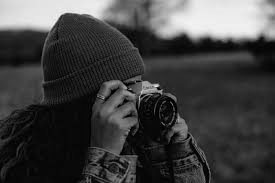

tensor([[[0.8157, 0.8196, 0.8235,  ..., 0.3804, 0.3843, 0.3922],
         [0.8157, 0.8196, 0.8235,  ..., 0.4000, 0.4000, 0.4039],
         [0.8157, 0.8157, 0.8196,  ..., 0.4275, 0.4235, 0.4235],
         ...,
         [0.0275, 0.0627, 0.0745,  ..., 0.1020, 0.1020, 0.0980],
         [0.0235, 0.0431, 0.0627,  ..., 0.1020, 0.1020, 0.1020],
         [0.0275, 0.0353, 0.0588,  ..., 0.1059, 0.1059, 0.1020]]])
torch.Size([1, 183, 275])


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from torchvision.transforms import transforms
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt


img=cv2.imread('/content/random.jpeg')
img=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
cv2_imshow(img)

trans=transforms.Compose([transforms.ToTensor()])
img_tensor=trans(img)
print(img_tensor)
print(img_tensor.shape)

In [ ]:
def create_gaussian_kernel(ksize,sigma):
    ax=torch.arange(-(ksize//2),ksize//2+1)
    x,y=torch.meshgrid(ax,ax,indexing='ij')
    kernel=torch.exp(-(x**2+y**2)/(2*sigma**2))
    kernel=kernel/kernel.sum()
    return kernel

tensor([[1.4351e-16, 3.1610e-12, 1.2752e-09, 9.4227e-09, 1.2752e-09, 3.1610e-12,
         1.4351e-16],
        [3.1610e-12, 6.9625e-08, 2.8089e-05, 2.0755e-04, 2.8089e-05, 6.9625e-08,
         3.1610e-12],
        [1.2752e-09, 2.8089e-05, 1.1332e-02, 8.3731e-02, 1.1332e-02, 2.8089e-05,
         1.2752e-09],
        [9.4227e-09, 2.0755e-04, 8.3731e-02, 6.1869e-01, 8.3731e-02, 2.0755e-04,
         9.4227e-09],
        [1.2752e-09, 2.8089e-05, 1.1332e-02, 8.3731e-02, 1.1332e-02, 2.8089e-05,
         1.2752e-09],
        [3.1610e-12, 6.9625e-08, 2.8089e-05, 2.0755e-04, 2.8089e-05, 6.9625e-08,
         3.1610e-12],
        [1.4351e-16, 3.1610e-12, 1.2752e-09, 9.4227e-09, 1.2752e-09, 3.1610e-12,
         1.4351e-16]])


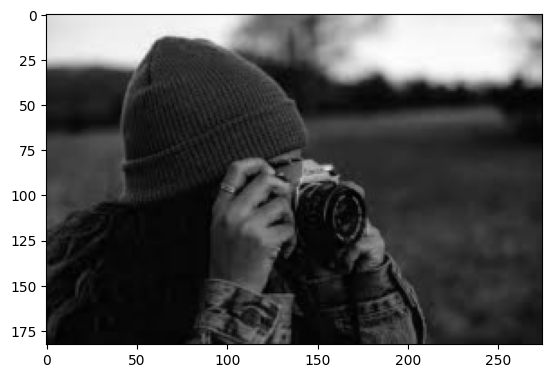

In [12]:
def apply_filter(img_tensor,kernel):
    ksize=kernel.shape[0]
    pad=ksize//2
    padded_img=F.pad(img_tensor,(pad,pad,pad,pad),mode='reflect')
    kernel = kernel.unsqueeze(0).unsqueeze(0)
    filtered_img = F.conv2d(padded_img, kernel)
    return filtered_img

gaussian_result=create_gaussian_kernel(ksize=6,sigma=0.5)
print(gaussian_result)

result=apply_filter(img_tensor,gaussian_result)
arr=result.squeeze().detach().numpy()
plt.imshow(arr,cmap='gray')
plt.show()
